In [1]:
import pandas as pd
pd.set_option('display.max_rows', 999)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Exploratory Data Analysis**

In [334]:
# read in data
covid_f_raw = pd.read_csv('data/covid_forecast_2020-12-03.csv')
covid_h_raw = pd.read_csv('data/COVID_historical_us-counties.csv',
                         converters={'fips': lambda x: str(x)})

In [335]:
census_raw = pd.read_csv('data/2010_census_pop.csv',
                    converters={'Zip Code ZCTA': lambda x: str(x)})
pop_den_raw = pd.read_csv('data/uszips_pop_density.csv',
                     converters={'zip': lambda x: str(x)})

In [336]:
fb = pd.read_table('data/county_county_aug2020.tsv', 
                   converters={'user_loc': lambda x: str(x), 
                               'fr_loc': lambda x: str(x)})

In [337]:
zips_fips_raw = pd.read_csv('data/zips_fips.csv',
                           converters={'ZIP': lambda x: str(x),
                                      'STCOUNTYFP': lambda x: str(x)})

**Areas of interest**

```
Challenges:
1) large dataset
- use random samples or duplicates?
2) dispersion of data -> challenging to work with
- use log transformation?

Notes
- how to treat counties?  Have to treat them in pairs or singularly?
- some counties are dropped because of low fb users
- SCI formula
- upscaling/downscaling from fips pop to zip pop to derive cases/zip

How to wrangle data:
1) Take random sample from population ~ 1 million rows
2) Remove duplicates ~ 5 million rows

Data Cleaning
1) add zeros to four digit zip codes - won't do
2) add population data by zip code - done
3) normalize cases/per capita - not started
4) dataset of cities and zip code - not started
5) added log transformation field - done

Views of Analysis:
- two buckets - high/low - won't do
- stratified buckets - 5 or more? 

EDA - questions to answer
The Basics
- Are zip links directional? - done
- What are the highest/smallest SCI indices, by zip? - done
    -> create histogram of distribution of SCI indices - done
- distribution of SCI indices? - done 
- What's the range of SCI indices? - done
- How many zip pairs are there? - done
- Average scaled_sci per zip? Zips with highest, lowest scaled_sci? - done, won't do
- view of zip and average SCI - done

How does the SCI relate to population? Do we see higher SCIs in zips with greater populations?
1a) SCI vs population, all zips - DONE
scatterplot of zip codes with dependent variable as SCI, independent variable as pop
1b) SCI vs population/sq kilometer - DONE
2) SCI vs population, grouped zips by population buckets
- What range does SCI take over various population buckets?

Additional Data Cleaning
- mapping of FIPs to ZIPs
- conversion of FIPs and ZIPs to dtype object vs int

Overall Trends - COVID vs SCI
1) SCI vs total COVID cases - DONE
2) SCI vs total COVID deaths - DONE

Historical spread of COVID, relationship to SCI - timeseries
1) How does the historical spread rate of COVID differ between counties with high SCI scores and those with low SCI scores?

Future spread of COVID, relationship to SCI
- Do prediction models indicate counties with higher SCIs will get more cases?

Can I provide a recommendation to public health experts on potential areas of spread?

Hypothesis testing
- Is the incidence of COVID between zip pairs with high SCI significantly different than the incidence of COVID between zip pairs with low SCI?

Questions
- How am I defining the incidence of COVID? Spread? total number of cases? growth rate over time?
- Recommendations/audience definition

Extra Credit
Network graph approach 
- how should network analysis be used as a tool to fight disease spread?
1) Which nodes (zip codes) have the highest number of connections to other nodes (zip codes)? 
1a) Which nodes w/highest covid spread have highest number of connections to other high disease nodes? 
* edges would be scaled for a minimum SCI
* degree centrality

GIS graphs
- sample two counties - show maps of SCI

Story:
How does a ZIP's SCI impact itself?
0) What SCI is
1) Distribution of SCI
- average
2) SCI vs Population
- examples
3) SCI vs COVID
- muted trends
- maybe covid is too widespread to notice any significant differences?
4) SCI vs COVID timeseries

How does a ZIP's SCI impact other ZIPs?



data sources:
covid_forecast_2020-12-03.csv - nytimes
COVID_historical_us-counties.csv - nytimes
fb_SCI_county_county_aug2020.tsv - facebook data for good
2010_census_pop.csv - US Census Bureau 
uszips_pop_density.csv - https://simplemaps.com/data/us-zips
zip-county-fips - https://www.kaggle.com/danofer/zipcodes-county-fips-crosswalk

c_historical = pd.read_csv('data/COVID_historical_us-counties.csv')
fb_sci = pd.read_csv('data/fb_SCI_county_county_aug2020.tsv', sep='\t')
census = pd.read_csv('data/2010_census_pop.csv')
pop_den = uszips_pop_density.csv
zip_fips = zips_fips.csv
```


## Data Cleaning

In [338]:
# create 
fb['log_sci'] = np.log10(fb['scaled_sci'])

In [339]:
# create population density table
pop_den = pop_den_raw[['zip', 'density']]
pop_den

,zip,density
0,00601,111.4
1,00602,523.5
2,00603,667.9
3,00606,60.4
4,00610,312.0
...,...,...
33092,99923,2.1
33093,99925,5.7
33094,99926,4.2
33095,99927,0.2


In [340]:
pop_den

,zip,density
0,00601,111.4
1,00602,523.5
2,00603,667.9
3,00606,60.4
4,00610,312.0
...,...,...
33092,99923,2.1
33093,99925,5.7
33094,99926,4.2
33095,99927,0.2


## EDA - questions to answer

### The Basics

**Are zip links directional?**

In [341]:
fb['scaled_sci']

0           13971142
1             145133
2             200193
3             371688
4              95859
              ...   
10426436       13881
10426437        8328
10426438    11155562
10426439    14004203
10426440    37515311
Name: scaled_sci, Length: 10426441, dtype: int64

**What are the min and max SCIs?**

In [342]:
fb['scaled_sci'].describe().astype(int)

count      10426441
mean          46074
std         2179666
min               1
25%            1081
50%            1942
75%            4036
max      1000000000
Name: scaled_sci, dtype: int64

**What is the distribution of SCI indices?**

In [343]:
fb.median()

user_loc      30035.000000
fr_loc        30035.000000
scaled_sci     1942.000000
log_sci           3.288249
dtype: float64

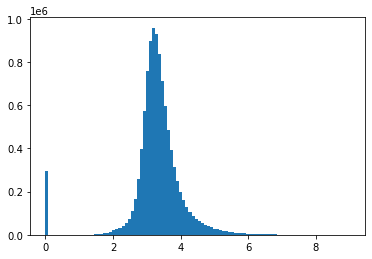

In [344]:
plt.hist(fb['log_sci'], bins=100);

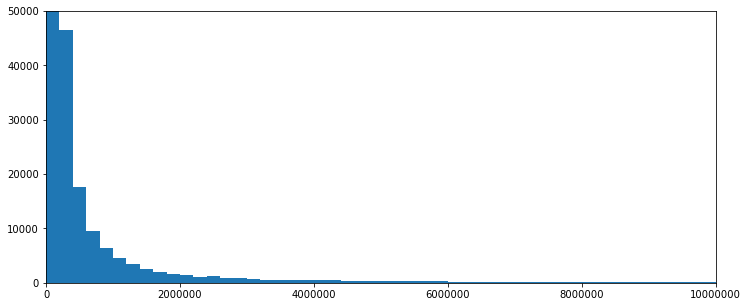

In [345]:
fig, ax = plt.subplots(figsize=(12, 5))
counts, bins, patches = ax.hist(fb['scaled_sci'], bins=5000)
ax.set_ylim(0, 50000)
ax.set_xlim(0, 10000000)
ax.ticklabel_format(useOffset=False, style='plain')

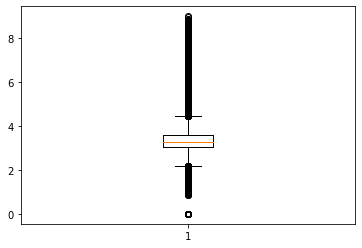

In [346]:
plt.boxplot(fb['log_sci'])
ax.ticklabel_format(useOffset=False, style='plain');

**Average scaled_sci per zip?**

In [347]:
fb.columns

Index(['user_loc', 'fr_loc', 'scaled_sci', 'log_sci'], dtype='object')

In [348]:
fb.groupby(by='user_loc').sum('scaled_sci').astype(int).sort_values(by='log_sci')

,scaled_sci,log_sci
user_loc,,
60020,606989480,2250
69100,506414831,3551
69120,422975097,4891
72093,406876391,5718
72095,275029813,6020
...,...,...
37133,37086591,12432
38053,161550822,12460
29169,53971024,12493


In [349]:
fb.sort_values(by='scaled_sci')

,user_loc,fr_loc,scaled_sci,log_sci
568263,05129,72079,1,0.000000
5483041,31091,06027,1,0.000000
6486550,38039,48393,1,0.000000
6486549,38039,48391,1,0.000000
4328891,27055,38085,1,0.000000
...,...,...,...,...
8197740,48033,48033,684633720,8.835458
7722930,46063,46063,757162537,8.879189
5332730,30109,30109,789302096,8.897243
303620,02282,02282,899409678,8.953958


### How does the SCI relate to population?

#### SCI vs Population

In [350]:
census_raw

,Zip Code ZCTA,2010 Census Population
0,01001,16769
1,01002,29049
2,01003,10372
3,01005,5079
4,01007,14649
...,...,...
33087,99923,87
33088,99925,819
33089,99926,1460
33090,99927,94


In [351]:
census_join = census_raw.set_index('Zip Code ZCTA').join(fb.set_index('user_loc'))
cen_re = census_join.reset_index().dropna(axis=0).drop(columns='fr_loc').groupby(by='index').mean('scaled_sci')
cen_re.rename(columns={'index':'user_zip', '2010 Census Population': 'pop'}, inplace=True)

In [352]:
cen_re.reset_index()

,index,pop,scaled_sci,log_sci
0,01001,16769.0,18051.920718,3.447295
1,01003,10372.0,10736.893465,3.591924
2,01005,5079.0,69717.397027,3.284667
3,01007,14649.0,36740.415609,3.277721
4,01009,741.0,13407.449675,3.320542
...,...,...,...,...
1486,72141,625.0,37517.751936,2.324113
1487,72143,35169.0,27528.043667,2.530625
1488,72149,0.0,48107.852896,2.163793
1489,72153,2572.0,39053.460824,2.377968


In [353]:
x = cen_re['pop']
y = cen_re['scaled_sci']

Text(0.5, 1.0, 'Mean SCI vs. Population')

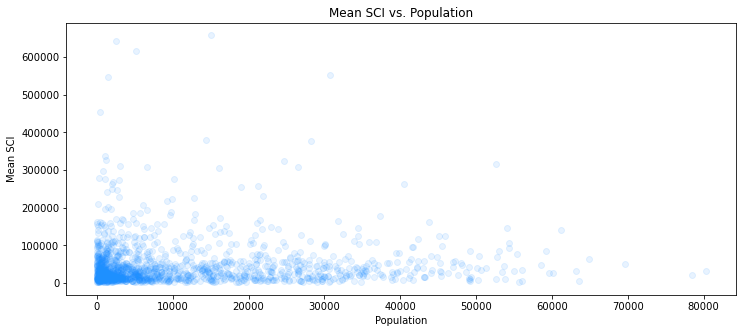

In [354]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
plt.scatter(x, y, alpha=.1, color='dodgerblue')
ax.set_ylabel('Mean SCI')
ax.set_xlabel('Population')
ax.set_title('Mean SCI vs. Population')

#### SCI vs Population, log transformation

In [355]:
cen_re['log_sci'] = np.log10(cen_re['scaled_sci'])

In [356]:
x = cen_re['pop']
y = cen_re['log_sci']

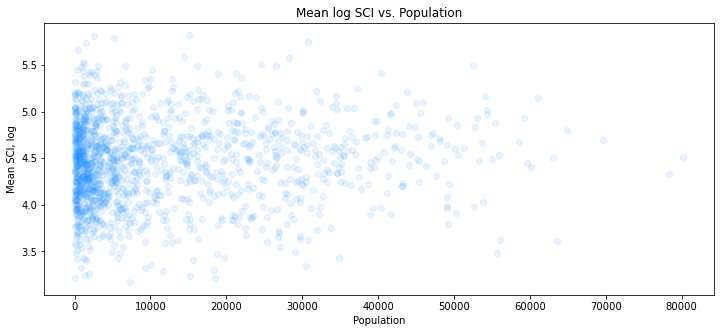

In [357]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
plt.scatter(x, y, alpha=.1, color='dodgerblue')
ax.set_ylabel('Mean SCI, log')
ax.set_xlabel('Population')
ax.set_title('Mean log SCI vs. Population');

#### SCI (log transformation) vs Population/sq km

In [358]:
popdensci = cen_re.join(pop_den.set_index('zip'))

''

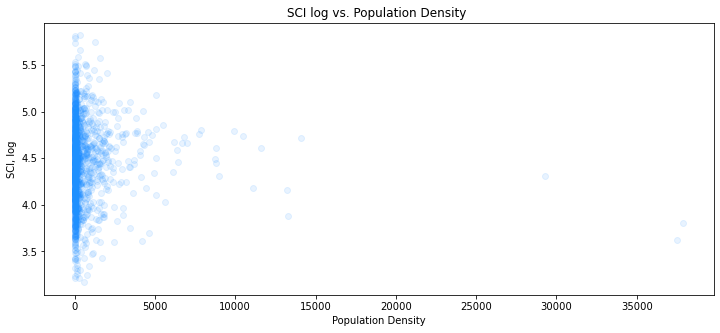

In [359]:
x = popdensci['density']
y = popdensci['log_sci']

fig, ax = plt.subplots(1, 1, figsize=(12, 5))
plt.scatter(x, y, alpha=.1, color='dodgerblue')
ax.set_ylabel('SCI, log')
ax.set_xlabel('Population Density')
ax.set_title('SCI log vs. Population Density ')
;

### SCI vs total COVID cases

#### Data Cleaning

In [360]:
# grouping covid cases by fips
covid_h = covid_h_raw.groupby('fips').max()
# tables used below:
## popdensci, zips_fips_raw, covid_h

In [365]:
covid_h

,fips,date,county,state,cases,deaths
1,01001,2020-12-04,Autauga,Alabama,2945,42.0
2,01003,2020-12-04,Baldwin,Alabama,9501,138.0
3,01005,2020-12-04,Barbour,Alabama,1217,29.0
4,01007,2020-12-04,Bibb,Alabama,1270,38.0
5,01009,2020-12-04,Blount,Alabama,3231,46.0
...,...,...,...,...,...,...
3135,69110,2020-12-04,Saipan,Northern Mariana Islands,104,2.0
3136,69120,2020-12-04,Tinian,Northern Mariana Islands,2,0.0
3215,78010,2020-12-04,St. Croix,Virgin Islands,609,7.0
3216,78020,2020-12-04,St. John,Virgin Islands,106,1.0


In [376]:
popdensci_join

,zips,pop,scaled_sci,log_sci,density,COUNTYNAME,STATE,CLASSFP
fips,,,,,,,,
01001,36067,26954.0,5277.014246,3.722388,43.5,Autauga County,AL,H1
01001,36003,1975.0,14718.700526,4.167869,8.2,Autauga County,AL,H1
01001,36091,3648.0,6445.646330,3.809266,17.2,Autauga County,AL,H1
01001,36051,2304.0,10743.957572,4.031164,17.5,Autauga County,AL,H1
01005,36017,3318.0,12606.702694,4.100602,20.6,Barbour County,AL,H1
...,...,...,...,...,...,...,...,...
55133,53045,21686.0,7415.146795,3.870120,582.4,Waukesha County,WI,H1
55133,53007,1841.0,8779.978012,3.943493,920.2,Waukesha County,WI,H1
55133,53017,5538.0,8285.122639,3.918299,122.2,Waukesha County,WI,H1


In [379]:
# covid_h = covid_h.reset_index()
covid_h['fips'].replace('', np.nan, inplace=True)
covid_h = covid_h.dropna()
popdensci_join = popdensci.join(zips_fips_raw.set_index('ZIP')).reset_index().sort_values('STCOUNTYFP')
popdensci_join = popdensci_join.dropna()
popdensci_join = popdensci_join.rename(columns={'index':'zips', 'STCOUNTYFP':'fips'})
popdensci_join = popdensci_join.set_index('fips')
popdensci_join = popdensci_join.join(covid_h.set_index('fips'))

In [385]:
popdensci_join = popdensci_join.reset_index()

In [386]:
# upscaling/downscaling data
popdensci_join['fip_pop'] = popdensci_join['pop'].groupby(popdensci_join['fips']).transform('sum')
popdensci_join['zip_pop_percent'] = popdensci_join['pop']/popdensci_join['fip_pop']
popdensci_join['cases_per_zip'] = popdensci_join['zip_pop_percent'] * popdensci_join['cases']
popdensci_join['deaths_per_zip'] = popdensci_join['zip_pop_percent'] * popdensci_join['deaths']
popdensci_join['cases_per_capita'] = popdensci_join['cases_per_zip'] / popdensci_join['deaths']


''

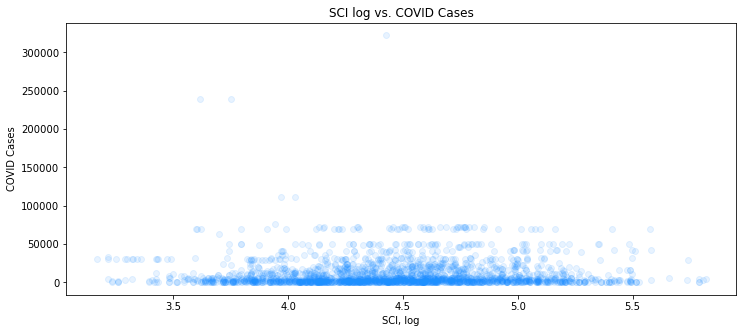

In [387]:
x = popdensci_join['log_sci']
y = popdensci_join['cases']


fig, ax = plt.subplots(1, 1, figsize=(12, 5))
plt.scatter(x, y, alpha=.1, color='dodgerblue')
ax.set_xlabel('SCI, log')
ax.set_ylabel('COVID Cases')
ax.set_title('SCI log vs. COVID Cases')
# ax.set_ylim(0, 25)
;

''

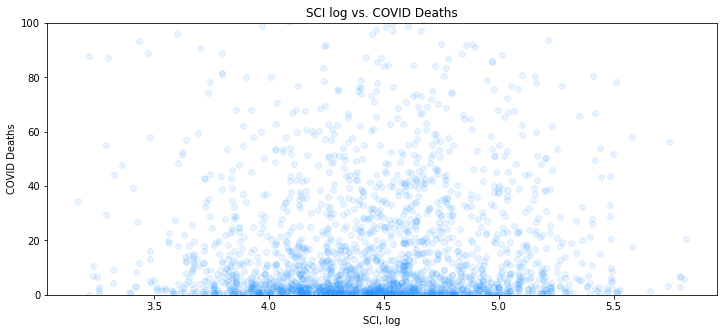

In [388]:
x = popdensci_join['log_sci']
y = popdensci_join['deaths_per_zip']


fig, ax = plt.subplots(1, 1, figsize=(12, 5))
plt.scatter(x, y, alpha=.1, color='dodgerblue')
ax.set_xlabel('SCI, log')
ax.set_ylabel('COVID Deaths')
ax.set_title('SCI log vs. COVID Deaths')
ax.set_ylim(0, 100)
;

''

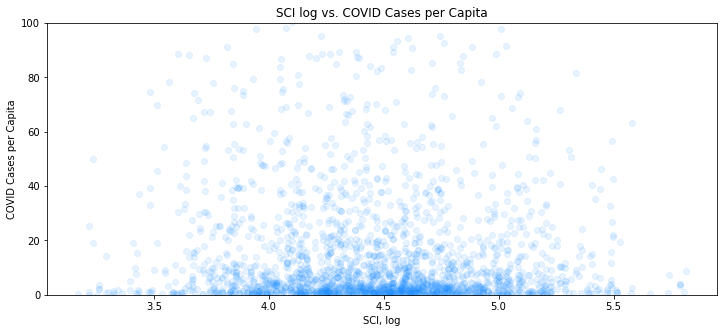

In [389]:
x = popdensci_join['log_sci']
y = popdensci_join['cases_per_capita']


fig, ax = plt.subplots(1, 1, figsize=(12, 5))
plt.scatter(x, y, alpha=.1, color='dodgerblue')
ax.set_xlabel('SCI, log')
ax.set_ylabel('COVID Cases per Capita')
ax.set_title('SCI log vs. COVID Cases per Capita')
ax.set_ylim(0, 100)
;

### SCI vs COVID cases, timeseries

#### Data Cleaning

In [421]:
# copy cen_re into new df
# create SCI quantile groups
cen_re_timeseries = cen_re.copy()
cen_re_timeseries.loc[cen_re_timeseries['log_sci'] <= cen_re_timeseries['log_sci'].quantile(.25), 'SCI_lower_25'] = '1'
cen_re_timeseries.loc[cen_re_timeseries['log_sci'] >= cen_re_timeseries['log_sci'].quantile(.75), 'SCI_upper_25'] = '1'
cen_re_timeseries.loc[(cen_re_timeseries['log_sci'] > cen_re_timeseries['log_sci'].quantile(.25)) & \
           (cen_re_timeseries['log_sci'] < cen_re_timeseries['log_sci'].quantile(.75)) , \
           'SCI_middle_50'] = '1'

# join cen_re_timeseries to zips/fips mapping and covid_h_raw
cen_re_timeseries = cen_re_timeseries.reset_index().rename(columns={'index':'zip'})
cen_re_timeseries = cen_re_timeseries.set_index('zip').join(zips_fips_raw.set_index('ZIP')).reset_index().rename(columns={'index':'zip'})
cen_re_timeseries = cen_re_timeseries.set_index('STCOUNTYFP').join(covid_h_raw.set_index('fips'))

In [445]:
# cen_re_timeseries = cen_re_timeseries.drop(columns=['pop', 'CLASSFP'])

In [454]:
cen_re_timeseries

,zip,scaled_sci,log_sci,SCI_lower_25,SCI_upper_25,SCI_middle_50,COUNTYNAME,STATE,date,county,state,cases,deaths
25013,01001,18051.920718,4.256523,NaN,NaN,1,Hampden County,MA,2020-03-15,Hampden,Massachusetts,1.0,0.0
25013,01001,18051.920718,4.256523,NaN,NaN,1,Hampden County,MA,2020-03-16,Hampden,Massachusetts,1.0,0.0
25013,01001,18051.920718,4.256523,NaN,NaN,1,Hampden County,MA,2020-03-17,Hampden,Massachusetts,1.0,0.0
25013,01001,18051.920718,4.256523,NaN,NaN,1,Hampden County,MA,2020-03-18,Hampden,Massachusetts,2.0,0.0
25013,01001,18051.920718,4.256523,NaN,NaN,1,Hampden County,MA,2020-03-19,Hampden,Massachusetts,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48265,78010,24755.935893,4.393679,NaN,NaN,1,Kerr County,TX,2020-12-02,Kerr,Texas,1072.0,21.0
48019,78010,24755.935893,4.393679,NaN,NaN,1,Bandera County,TX,2020-12-03,Bandera,Texas,280.0,11.0
48265,78010,24755.935893,4.393679,NaN,NaN,1,Kerr County,TX,2020-12-03,Kerr,Texas,1077.0,24.0
48019,78010,24755.935893,4.393679,NaN,NaN,1,Bandera County,TX,2020-12-04,Bandera,Texas,281.0,11.0


In [557]:
middle_50 = cen_re_timeseries.loc[cen_re_timeseries['SCI_middle_50'] == '1'].groupby(['date']).mean('cases')
middle_50 = middle_50.drop(columns=['scaled_sci', 'log_sci', 'deaths']).rename(columns={'cases':'middle_50'})

lower_25 = cen_re_timeseries.loc[cen_re_timeseries['SCI_lower_25'] == '1'].groupby('date').mean('cases')
lower_25 = lower_25.drop(columns=['scaled_sci', 'log_sci', 'deaths']).rename(columns={'cases':'lower_25'})

upper_25 = cen_re_timeseries.loc[cen_re_timeseries['SCI_upper_25'] == '1'].groupby('date').mean('cases')
upper_25 = upper_25.drop(columns=['scaled_sci', 'log_sci', 'deaths']).rename(columns={'cases':'upper_25'})

quadrants = pd.concat([lower_25, middle_50, upper_25], axis=1)

quadrants = quadrants.sort_index()

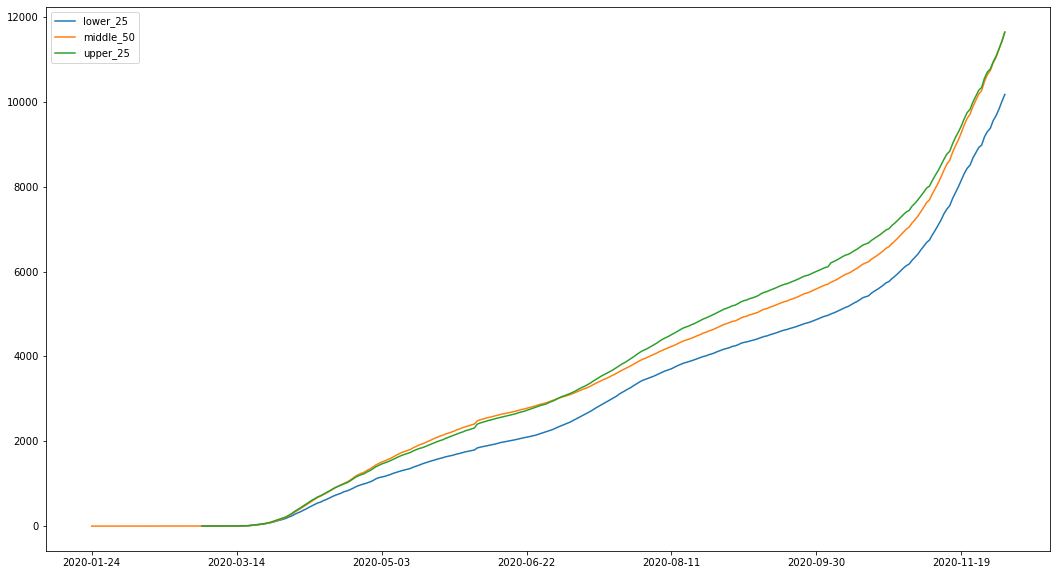

In [558]:
quadrants.plot.line(figsize=(18,10))